<a href="https://colab.research.google.com/github/jmccahill5/datman/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [142]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler


from google.colab import files


import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline

# FIRST API

In [143]:
#say 5 tools such as: 1 reshape, 1 pivot, 1 meld, and 1 stack, and 1 unstack; it depends on the complexity and utility, if its great
#could be 3 tools; if its poor, should be more like 10 tools; can use tool say 2x if needed; don’t forget about APIs, count as a
#tool, too (covered next week)


In [144]:
#FRED API
#This dataset is from the st Louis FED and shows interest rates charged on credit cards for certain months since 2000
#url: https://fred.stlouisfed.org/series/TERMCBCCALLNS

In [145]:
start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2021, 1, 1)

Interest = pdr.DataReader('TERMCBCCALLNS', 'fred', start, end)
Interest

,TERMCBCCALLNS
DATE,
2000-01-01,NaN
2000-02-01,15.55
2000-03-01,NaN
2000-04-01,NaN
2000-05-01,15.60
...,...
2020-09-01,NaN
2020-10-01,NaN
2020-11-01,14.65


In [146]:
#Some months show as NaN since no data was collected, so rows with NaN are dropped using dropna

In [147]:
Interest = Interest.dropna()

In [148]:
Interest


,TERMCBCCALLNS
DATE,
2000-02-01,15.55
2000-05-01,15.60
2000-08-01,15.98
2000-11-01,15.99
2001-02-01,15.63
...,...
2019-11-01,14.87
2020-02-01,15.09
2020-05-01,14.52


<Axes: xlabel='DATE'>

Text(0, 0.5, 'Credit card Interest %')

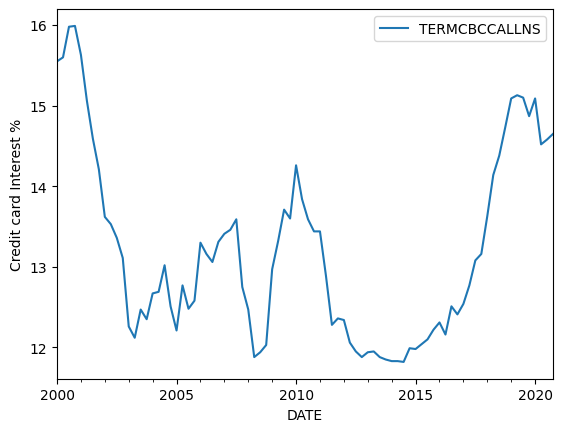

In [149]:
Interest.plot()
# Label y axes
plt.ylabel('Credit card Interest %')
#This shows the credit card interest that was charged each year

In [150]:
#The cost of credit is important for housing, specifically when it comes to financing and mortgage rates

# SECOND API

In [151]:
#FRED API
#This dataset is from the st Louis FED and shows Outstanding mortgage debt 1949 - 2019
#url: https://fred.stlouisfed.org/series/MDOAH

In [152]:
start = datetime.datetime (1955, 1, 1)
end = datetime.datetime (2019, 1, 1)

MORTGAGE = pdr.DataReader('MDOAH', 'fred', start, end)
MORTGAGE

,MDOAH
DATE,
1955-01-01,128671.00
1955-04-01,133115.00
1955-07-01,137348.00
1955-10-01,141566.00
1956-01-01,145393.00
...,...
2018-01-01,14979025.26
2018-04-01,15144935.79
2018-07-01,15290110.00


In [153]:
MORTAGE=MORTGAGE.dropna()

In [154]:
MORTGAGE

,MDOAH
DATE,
1955-01-01,128671.00
1955-04-01,133115.00
1955-07-01,137348.00
1955-10-01,141566.00
1956-01-01,145393.00
...,...
2018-01-01,14979025.26
2018-04-01,15144935.79
2018-07-01,15290110.00


<Axes: xlabel='DATE'>

Text(0, 0.5, 'Outstanding Mortage Debt')

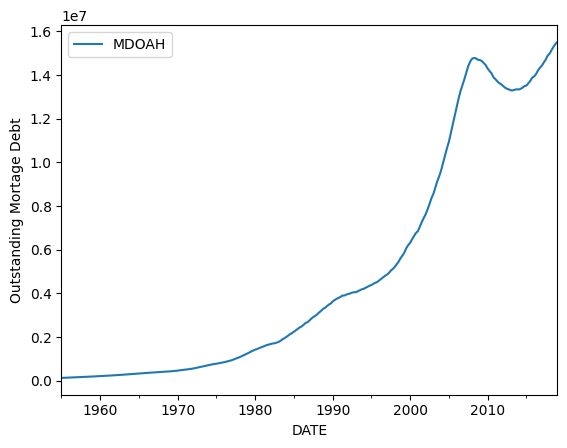

In [155]:
MORTGAGE.plot()
# Label y axes
plt.ylabel('Outstanding Mortage Debt')
#This shows the Outstanding mortgage debt in the US each year

In [156]:
# Mortgage debt directly correlates with house values, since the higher the price of a home, the more money you will have to borrow
# An interesting part of the graph is the abrupt decline in mortgage debt around 2009, which is when the housing bubble occured
# It seems to have since began to follow the same curve and housing prices nowadays are unreasonably high if you ask me

# Pulling dataset from PS3 to use for Profiling tool

In [157]:
# Instead of Merging on Date, I will incorporate similar variables but merge on State with 2022 data

In [158]:
# Data link :https://www.bankrate.com/real-estate/median-home-price/#median-price-by-state

In [159]:
#this dataset incorporates only the MEDIAN home price for each state. I will merge it with economic data from each state
#data was collected in June 2023

!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/state%20data%20.csv

In [160]:
datST1=pd.read_csv('ex1.csv')

In [161]:
datST1.head(10)

,State,Price
0,Alabama,286000
1,Alaska,384000
2,Arizona,443000
3,Arkansas,259000
4,California,799000
5,Colorado,582000
6,Connecticut,432000
7,Delaware,335000
8,District of Columbia,606000
9,Florida,409000


In [162]:
#merging economic data for each state
#link: https://www.forbes.com/advisor/business/average-salary-by-state/

In [163]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/wage%20data.csv

In [164]:
datST2=pd.read_csv('ex1.csv')

In [165]:
datST2.head(10)

,State,Annual Average Wage,Average Hourly Wage
0,Alabama,50620,24.32
1,Alaska,66130,31.79
2,Arizona,58620,28.18
3,Arkansas,48570,23.35
4,California,73220,35.20
5,Colorado,67870,32.63
6,Connecticut,69310,33.32
7,Delaware,62260,29.93
8,Florida,55980,26.91
9,Georgia,58000,27.88


In [166]:
mergedSTATE = pd.merge(datST1, datST2, how='outer', on=['State'],indicator=True)

In [167]:
#this merged dataset looks at the average salary for each state, one being annual and one hourly
#the District of Columbia did not merge, since it was incorporated only in the first dataset

In [168]:
mergedSTATE #aok very good!

,State,Price,Annual Average Wage,Average Hourly Wage,_merge
0,Alabama,286000,50620.0,24.32,both
1,Alaska,384000,66130.0,31.79,both
2,Arizona,443000,58620.0,28.18,both
3,Arkansas,259000,48570.0,23.35,both
4,California,799000,73220.0,35.20,both
5,Colorado,582000,67870.0,32.63,both
6,Connecticut,432000,69310.0,33.32,both
7,Delaware,335000,62260.0,29.93,both
8,District of Columbia,606000,NaN,NaN,left_only
9,Florida,409000,55980.0,26.91,both


In [169]:
#you can see the median home prices vs the average wages in the graph below. In general, median prices are lower where incomes are lower

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Annual Average Wage')

Text(0.5, 1.0, 'Median Price vs. Annual Average Wage')

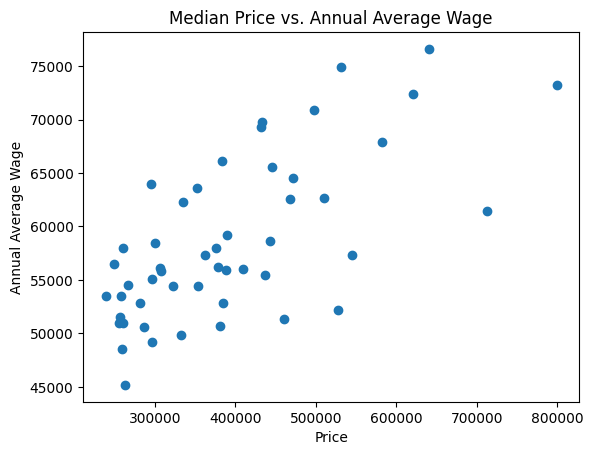

In [170]:
# Extract the two variables
x = mergedSTATE['Price']
y = mergedSTATE['Annual Average Wage']

# Create the scatterplot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Annual Average Wage')
plt.title('Median Price vs. Annual Average Wage')

# Show the plot
plt.show()

In [171]:
## These two dataset show the population and population density.
## links : https://wisevoter.com/state-rankings/population-density-by-state/#states-by-population-density
## https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1

In [172]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/data%20pop.csv

In [173]:
datST4=pd.read_csv('ex1.csv')

In [174]:
datST4.head(10)

,Unnamed: 0,State,Population
0,1,California,39029342
1,2,Texas,30029572
2,3,Florida,22244823
3,4,New York,19677151
4,5,Pennsylvania,12972008
5,6,Illinois,12582032
6,7,Ohio,11756058
7,8,Georgia,10912876
8,9,North Carolina,10698973
9,10,Michigan,10034113


In [175]:
datST4.drop('Unnamed: 0', axis=1, inplace=True)

In [176]:
datST4.head(5)

,State,Population
0,California,39029342
1,Texas,30029572
2,Florida,22244823
3,New York,19677151
4,Pennsylvania,12972008


In [177]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/datapopdenn.csv

In [178]:
popden = pd.read_csv('ex1.csv')
popden

,State,Pop. Den (per mi sq.)
0,New Jersey,1283.40
1,Rhode Island,1074.30
2,Massachusetts,919.82
3,Connecticut,746.70
4,Maryland,648.84
5,Delaware,522.09
6,New York,433.90
7,Florida,416.96
8,Pennsylvania,292.62
9,Ohio,290.70


In [179]:
del mergedSTATE['_merge']

In [180]:
mergedSTATE2 = pd.merge(mergedSTATE, popden, how='outer', on=['State'],indicator=True)

In [181]:
# District of Columbia did not Merge as expected

In [182]:
mergedSTATE2

,State,Price,Annual Average Wage,Average Hourly Wage,Pop. Den (per mi sq.),_merge
0,Alabama,286000,50620.0,24.32,100.65,both
1,Alaska,384000,66130.0,31.79,1.30,both
2,Arizona,443000,58620.0,28.18,64.96,both
3,Arkansas,259000,48570.0,23.35,58.43,both
4,California,799000,73220.0,35.20,258.21,both
5,Colorado,582000,67870.0,32.63,57.86,both
6,Connecticut,432000,69310.0,33.32,746.70,both
7,Delaware,335000,62260.0,29.93,522.09,both
8,District of Columbia,606000,NaN,NaN,NaN,left_only
9,Florida,409000,55980.0,26.91,416.96,both


In [183]:
#This graph shows the population density for each state along with their median home price. There does not seem to be a strong correlation
#in any direction, but if anything, homes were slightly more expensive in densely populated states

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Pop. Den (per mi sq.)')

Text(0.5, 1.0, 'Median Price vs. Pop. Den (per mi sq.)')

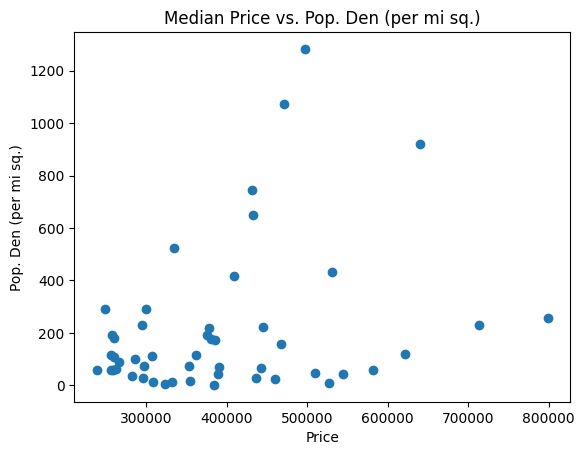

In [184]:
# Extract the two variables
x = mergedSTATE2['Price']
y = mergedSTATE2['Pop. Den (per mi sq.)']

# Create the scatterplot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Pop. Den (per mi sq.)')
plt.title('Median Price vs. Pop. Den (per mi sq.)')

# Show the plot
plt.show()

In [185]:
# 5th dataset

In [186]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/political%20data.csv

In [187]:
politics = pd.read_csv('ex1.csv')

In [188]:
# R shows that state voted Republican in 2020, D fro Democrat

In [189]:
print(politics)

             State 2020 results
0          Alabama            R
1           Alaska            R
2          Arizona            D
3         Arkansas            R
4       California            D
5         Colorado            D
6      Connecticut            D
7         Delaware            D
8             D.C.            D
9          Florida            R
10         Georgia            D
11          Hawaii            D
12           Idaho            R
13        Illinois            D
14         Indiana            R
15            Iowa            R
16          Kansas            R
17        Kentucky            R
18       Louisiana            R
19           Maine            D
20        Maryland            D
21   Massachusetts            D
22        Michigan            D
23       Minnesota            D
24     Mississippi            R
25        Missouri            R
26         Montana            R
27        Nebraska            R
28          Nevada            D
29   New Hampshire            D
30      

In [190]:
mergedSTATE3 = pd.merge(mergedSTATE2, politics, how='outer', on=['State'])

In [191]:
mergedSTATE3

,State,Price,Annual Average Wage,Average Hourly Wage,Pop. Den (per mi sq.),_merge,2020 results
0,Alabama,286000.0,50620.0,24.32,100.65,both,R
1,Alaska,384000.0,66130.0,31.79,1.30,both,R
2,Arizona,443000.0,58620.0,28.18,64.96,both,D
3,Arkansas,259000.0,48570.0,23.35,58.43,both,R
4,California,799000.0,73220.0,35.20,258.21,both,D
5,Colorado,582000.0,67870.0,32.63,57.86,both,D
6,Connecticut,432000.0,69310.0,33.32,746.70,both,D
7,Delaware,335000.0,62260.0,29.93,522.09,both,D
8,District of Columbia,606000.0,NaN,NaN,NaN,left_only,NaN
9,Florida,409000.0,55980.0,26.91,416.96,both,R


In [192]:
# Define the condition
condition = mergedSTATE3['2020 results'] == 'D'

# Filter the Dataset based on the condition
filtered_data = mergedSTATE3[condition]

# Calculate the average of the price for only D
average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 455280.0


In [193]:
# Same but for R
condition = mergedSTATE3['2020 results'] == 'R'

filtered_data = mergedSTATE3[condition]

average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 330520.0


In [194]:
## this comparision shows the average price of homes in states that voted democratic, and also states that voted Republican
## this shows that on average, states with higher home values voted democratic while states with lower land values voted republican
# Democratic average = $455,280
# Republican average = $330,520

# Profiling with mergedSTATE3 data

In [206]:
!pip install ydata-profiling #from aok code

In [196]:
!pip uninstall typing_extensions --yes
#!pip install typing-extensions --upgrade
!pip install typing_extensions==4.7.1  --upgrade

Found existing installation: typing_extensions 4.7.1
Uninstalling typing_extensions-4.7.1:
  Successfully uninstalled typing_extensions-4.7.1
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.


In [203]:
pip install --upgrade typing-extensions

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [204]:
pip install typing-extensions

In [205]:
from ydata_profiling import ProfileReport

ImportError: ignored

In [ ]:
ProfileReport(mergedSTATE3, title="State Housing Data")

# Stack Tool

In [198]:
mergedSTATE3

,State,Price,Annual Average Wage,Average Hourly Wage,Pop. Den (per mi sq.),_merge,2020 results
0,Alabama,286000.0,50620.0,24.32,100.65,both,R
1,Alaska,384000.0,66130.0,31.79,1.30,both,R
2,Arizona,443000.0,58620.0,28.18,64.96,both,D
3,Arkansas,259000.0,48570.0,23.35,58.43,both,R
4,California,799000.0,73220.0,35.20,258.21,both,D
5,Colorado,582000.0,67870.0,32.63,57.86,both,D
6,Connecticut,432000.0,69310.0,33.32,746.70,both,D
7,Delaware,335000.0,62260.0,29.93,522.09,both,D
8,District of Columbia,606000.0,NaN,NaN,NaN,left_only,NaN
9,Florida,409000.0,55980.0,26.91,416.96,both,R


In [199]:
mergedSTATE3=mergedSTATE3.unstack()

In [200]:
mergedSTATE3

State         0        Alabama
              1         Alaska
              2        Arizona
              3       Arkansas
              4     California
                       ...    
2020 results  47             D
              48             R
              49             D
              50             R
              51             D
Length: 364, dtype: object

In [ ]:
# using stack/unstack you can change how the data is displayed. When it is stacked, each State is shown with their values stacked on top
# of one another, when it is unstacked, it shows a normal table

# Melt tool

In [202]:
mergedSTATE3Melt = mergedSTATE3.unmelt(id_vars=['State'], var_name='Annual Average Wage', value_name='Price')
mergedSTATE3Melt.sort_values('Price')

AttributeError: ignored